# Parameter Learning

## 1. Gradient Descent

We may summarize our steps in the solution of our housing prices regression problem as follows:

- We proposed a hypothesis function:
  $$h_{\theta}(x) = \theta_0 + \theta_1 x.$$
  
- Whose parameters are:
  $$\theta_0, \theta_1.$$
  
- Then, we had the cost function:
  $$J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2,$$
  which accounts for the square of the vertical distance between the hypothesis function and the training examples.
  
- Our goal is to find the parameters $\theta_0$ and $\theta_1$ that solve the following optimization problem:
  $$\min_{\theta_0, \theta_1} J(\theta_0, \theta_1)$$

### How do we do this?:

- Start with some $\theta_0, \theta_1.$
- Keep changing $\theta_0, \theta_1$ to reduce $J(\theta_0, \theta_1)$ until we hopefully end up at a minimum.

The **gradient descent** algorithm, which we will explore in a moment, actually applies to cost functions with an arbitrary number of parameters:

$$J(\theta_0, \theta_1, \dots, \theta_n),$$

with $n\in\mathbb{N}$.

### Gradient descent algorithm

The gradient descent algorithm can be described as follows:

- Initialize $\theta_j$, for $j\in\{0, 1,\dots, n\}$.

- repeat until convergence {
  $$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1, \dots, \theta_n); \qquad \text{ for } j\in\{0, 1,\dots, n\}$$
  }

Or, in a vector form, with $\boldsymbol{\theta} = \left[\theta_0, \theta_1, \dots, \theta_n\right]^T\in\mathbb{R}^{n+1}$:

- Initialize $\boldsymbol{\theta}$.

- repeat until convergence {
  $$\boldsymbol{\theta} := \boldsymbol{\theta} - \alpha \frac{\partial}{\partial \boldsymbol{\theta}} J(\boldsymbol{\theta})$$
  }
  
where $\frac{\partial}{\partial \boldsymbol{\theta}} J(\boldsymbol{\theta})$ is the gradient of the function $J$.

> The *hyperparameter* $\alpha>0$ is called the **learning rate**. It basically controls how big/small is the step to be taken in the direction of the gradient $\frac{\partial}{\partial \boldsymbol{\theta}} J(\boldsymbol{\theta})$.

To gain some intuition with this algorithm, let's consider the function (of only one parameter)

$$J(\theta) = (\theta - 3)^2 + 1,$$

and its derivative

$$\frac{d}{d \theta} J(\theta) = 2(\theta - 3).$$

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Cost function
def J(t):
    return (t - 3)**2 + 1
# Derivative of the cost function
def dJ(t):
    return 2 * (t - 3)

In [3]:
t = np.linspace(0, 6, 101)

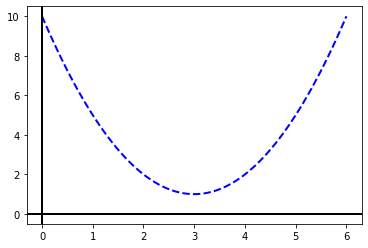

In [4]:
plt.figure(figsize=(6, 4))
plt.plot(t, J(t), 'b--', lw=2, label=r'$J(\theta)$')
plt.axhline(y=0, c='k', lw=2)
plt.axvline(x=0, c='k', lw=2)

Now, let's suppose that our initialization for the parameter is $\theta=5$. In this case, one iteration of the gradient descent algorithm, with $\alpha = 0.1$ would produce:

\begin{align}
    \theta & := \theta - 2\alpha (\theta - 3) \\
           &  = 5 - 0.1 \times 2 \times 2
\end{align}

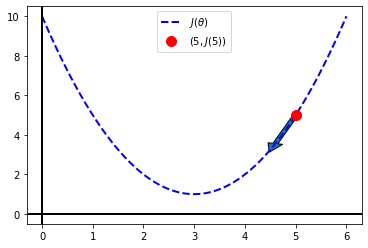

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(t, J(t), 'b--', lw=2, label=r'$J(\theta)$')
plt.plot(5, J(5), 'or', ms=10, label='$(5, J(5))$')
plt.arrow(x=5, y=J(5), dx=(5 - 0.1 * 2 * 2 - 5), dy=(J(5 - 0.1 * 2 * 2) - J(5)), width=0.1)
plt.legend(loc='best')
plt.axhline(y=0, c='k', lw=2)
plt.axvline(x=0, c='k', lw=2)

The update of $\theta=4.6$ is in the direction of the minimum.

Let's look at the behavior of the gradient descent algorithm until its convergence:

In [6]:
from grad_desc import grad_desc

In [7]:
steps = grad_desc(grad=dJ, x0=5, alpha=0.1, grad_tol=1e-3)

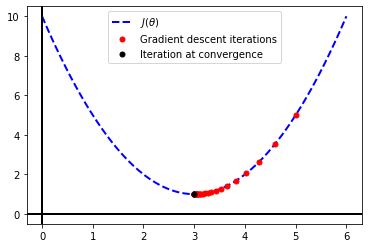

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(t, J(t), 'b--', lw=2, label=r'$J(\theta)$')
plt.plot(steps, J(steps), 'or', ms=5, label='Gradient descent iterations')
plt.plot(steps[-1], J(steps[-1]), 'ok', ms=5, label='Iteration at convergence')
plt.legend(loc='best')
plt.axhline(y=0, c='k', lw=2)
plt.axvline(x=0, c='k', lw=2)

Now, let's try initializing $\theta=0$:

In [9]:
steps = grad_desc(grad=dJ, x0=0, alpha=0.1, grad_tol=1e-3)

In [10]:
steps

array([0.        , 0.6       , 1.08      , 1.464     , 1.7712    ,
       2.01696   , 2.213568  , 2.3708544 , 2.49668352, 2.59734682,
       2.67787745, 2.74230196, 2.79384157, 2.83507326, 2.8680586 ,
       2.89444688, 2.91555751, 2.93244601, 2.9459568 , 2.95676544,
       2.96541235, 2.97232988, 2.97786391, 2.98229113, 2.9858329 ,
       2.98866632, 2.99093306, 2.99274645, 2.99419716, 2.99535772,
       2.99628618, 2.99702894, 2.99762316, 2.99809852, 2.99847882,
       2.99878306, 2.99902644, 2.99922116, 2.99937692, 2.99950154])

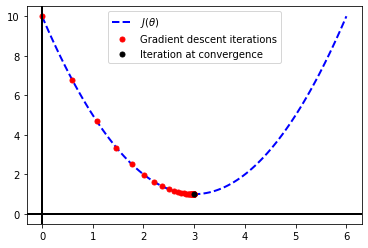

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(t, J(t), 'b--', lw=2, label=r'$J(\theta)$')
plt.plot(steps, J(steps), 'or', ms=5, label='Gradient descent iterations')
plt.plot(steps[-1], J(steps[-1]), 'ok', ms=5, label='Iteration at convergence')
plt.legend(loc='best')
plt.axhline(y=0, c='k', lw=2)
plt.axvline(x=0, c='k', lw=2)

### What about $\alpha$?

If $\alpha$ is too small, gradient descent can be slow:

In [12]:
steps = grad_desc(grad=dJ, x0=0, alpha=1e-4, grad_tol=1e-3)

In [13]:
len(steps)

43495

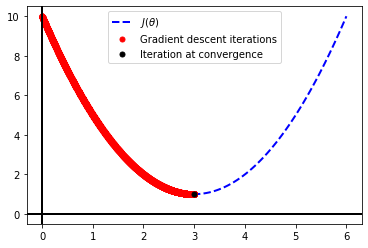

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(t, J(t), 'b--', lw=2, label=r'$J(\theta)$')
plt.plot(steps, J(steps), 'or', ms=5, label='Gradient descent iterations')
plt.plot(steps[-1], J(steps[-1]), 'ok', ms=5, label='Iteration at convergence')
plt.legend(loc='best')
plt.axhline(y=0, c='k', lw=2)
plt.axvline(x=0, c='k', lw=2)

If $\alpha$ is too large, gradient descent can fail to converge, or even diverge:

In [15]:
steps = grad_desc(grad=dJ, x0=2.5, alpha=1.5, grad_tol=1e-3, max_iter=10)

[-1, 7, -1, 10]

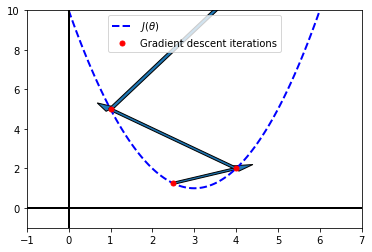

In [16]:
plt.figure(figsize=(6, 4))
plt.plot(t, J(t), 'b--', lw=2, label=r'$J(\theta)$')
plt.plot(steps, J(steps), 'or', ms=5, label='Gradient descent iterations')
dsteps = np.diff(steps)
plt.arrow(steps[0], J(steps[0]), dsteps[0], J(steps[1]) - J(steps[0]), width=0.1)
plt.arrow(steps[1], J(steps[1]), dsteps[1], J(steps[2]) - J(steps[1]), width=0.1)
plt.arrow(steps[2], J(steps[2]), dsteps[2], J(steps[3]) - J(steps[2]), width=0.1)
plt.legend(loc='best')
plt.axhline(y=0, c='k', lw=2)
plt.axvline(x=0, c='k', lw=2)
plt.axis([-1, 7, -1, 10])

### If we initialize already at a local optimum, the gradient descent will stuck at that point

In [17]:
steps = grad_desc(grad=dJ, x0=3, alpha=0.1, grad_tol=1e-3, max_iter=10)

In [18]:
len(steps)

1

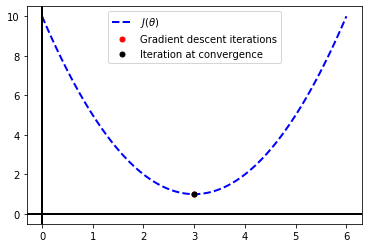

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(t, J(t), 'b--', lw=2, label=r'$J(\theta)$')
plt.plot(steps, J(steps), 'or', ms=5, label='Gradient descent iterations')
plt.plot(steps[-1], J(steps[-1]), 'ok', ms=5, label='Iteration at convergence')
plt.legend(loc='best')
plt.axhline(y=0, c='k', lw=2)
plt.axvline(x=0, c='k', lw=2)

## 2. Gradient descent for linear regression

Given that we proposed the hypothesis function:
  $$h_{\theta}(x) = \theta_0 + \theta_1 x,$$
  
with the cost function:
  $$J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2,$$

what are the partial derivatives of $J$?

\begin{align}
\frac{\partial}{\partial \theta_j} J(\theta_0, \theta_1) & = \frac{\partial}{\partial \theta_j}\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2 \\
& = \frac{\partial}{\partial \theta_j}\frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2, \qquad \text{ for } j=0,1
\end{align}

Thus, for $j=0$:

$$
\frac{\partial}{\partial \theta_0} J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}),
$$

and, for $j=1$:

$$
\frac{\partial}{\partial \theta_1} J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}.
$$

Equivalently, the gradient of $J$ is:

$$
\frac{\partial}{\partial \boldsymbol{\theta}} J(\theta_0, \theta_1) = \frac{1}{m}\left[
\begin{array}{c}
\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) \\
\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})x^{(i)}
\end{array}
\right].
$$

As we saw in the previous notebook, this is a (strictly) convex function. Thus, it has at most one local/global minimum. Under this conditions, the gradient descent algorithm is guaranteed to converge to that point.

In our housing prices example:

In [20]:
import pandas as pd

In [21]:
# Read the data
data = pd.read_csv("house_pricing.csv", low_memory=False)

In [22]:
# Data (scaled)
x = data['size'].values / 1000
y = data['price'].values / 100000
m = len(x)

In [23]:
# Hypothesis function (as a function of the params)
def h(t):
    return t[0] + t[1] * x
# Cost function
def J(t):
    return ((h(t) - y)**2).sum() / (2 * m)
# Gradient of the cost function
def dJ(t):
    return np.array([(h(t) - y).sum(), ((h(t) - y) * x).sum()]) / m

In [27]:
# Generate theta0, theta1 grid
t0 = np.linspace(-10, 30, 100)
t1 = np.linspace(-10, 10, 1000)
T0, T1 = np.meshgrid(t0, t1)

In [28]:
# Compute cost function in the theta0, theta1 grid
# TODO: find a more efficient way to evaluate this function
cost_fcn = np.zeros(T0.shape)
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        cost_fcn[i, j] = J([T0[i, j], T1[i, j]])

In [72]:
steps = grad_desc(grad=dJ, x0=np.array([30., 10.]), alpha=0.1, grad_tol=1e-3)

In [73]:
# Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

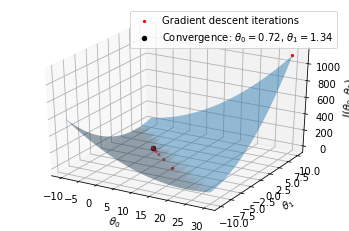

In [74]:
# 3D plot and gradient descent steps
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, cost_fcn, rstride=8, cstride=8, alpha=0.5)
ax.scatter(steps[::50, 0], steps[::50, 1], [J(step) for step in steps[::50]], c='r', s=5,
           label='Gradient descent iterations')
ax.scatter(steps[-1, 0], steps[-1, 1], J(steps[-1]), c='k',
           label=r'Convergence: $\theta_0=${}, $\theta_1=${}'.format(np.round(steps[-1, 0], 2), 
                                                                     np.round(steps[-1, 1],2)))
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta_0, \theta_1)$')
ax.legend()

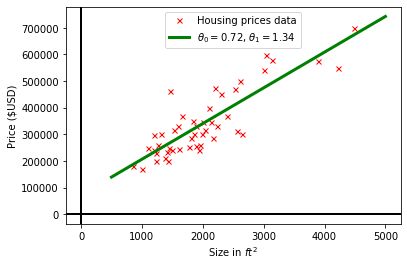

In [80]:
# Plot the corresponding lines
plt.figure(figsize=(6, 4))
plt.plot(data['size'], data['price'], 'xr', ms=5, label='Housing prices data')
x = np.linspace(500, 5000)
y = 100000 * (steps[-1, 0] + steps[-1, 1] * x / 1000)
plt.plot(x, y, 'g', lw=3,
         label=r'$\theta_0=${}, $\theta_1=${}'.format(np.round(steps[-1, 0], 2),
                                                      np.round(steps[-1, 1], 2)))
plt.axhline(y=0, c='k', lw=2)
plt.axvline(x=0, c='k', lw=2)
plt.xlabel('Size in $ft^2$')
plt.ylabel('Price ($USD)')
plt.legend(loc='best')

This version of the *gradient descent algorithm* is often called **batch gradient descent algorithm**, beacuse is uses all the training examples at each step of the process.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez. Based on the content of the Machine Learning course offered through coursera by Prof. Andrew Ng.
</footer>